# Pytrad

In [1]:
linux = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if linux:
    if module_path not in sys.path:
        sys.path.append(module_path+"/DataPreprocessing")
else:
    if module_path not in sys.path:
        sys.path.append(module_path+"\\DataPreprocessing")

## Data Preprocessing

In [3]:
if linux:
    # lab computers
    data_dir = "/home/diego.sanez/Documents/ML703_Project/Datasets/"
else:
    data_dir = "C:/Users/diego/iCloudDrive/Documents/MBZUAI Sem/Semester 2/ML703 Probabilistic and Statistical Inference/Project/JN/Datasets/"

company = pd.read_csv(data_dir + "Company.csv")
companyValues = pd.read_csv(data_dir + "CompanyValues.csv")
companyTweet = pd.read_csv(data_dir + "Company_Tweet.csv")
tweet = pd.read_csv(data_dir + "Tweet.csv")
tweet = tweet.merge(companyTweet, on="tweet_id", how='inner')

In [4]:
print(f"Stocks from {company.ticker_symbol.unique()}")

selected_stock = 'TSLA'
print(f"Stock selected: {selected_stock}")
companyValuesSub = companyValues[companyValues.ticker_symbol == selected_stock]
tweetSub = tweet[tweet.ticker_symbol == selected_stock]

Stocks from ['AAPL' 'GOOG' 'GOOGL' 'AMZN' 'TSLA' 'MSFT']
Stock selected: TSLA


In [5]:
print(f"Company values: \n{companyValuesSub.head(3)}")
print(f"Company tweets: \n{tweetSub.head(3)}")

Company values: 
      ticker_symbol    day_date  close_value    volume  open_value  \
14463          TSLA  2020-05-29       835.00  11812490      808.75   
14464          TSLA  2020-05-28       805.81   7275774      813.51   
14465          TSLA  2020-05-27       820.23  11549530      820.86   

       high_value  low_value  
14463      835.00     804.21  
14464      824.75     801.69  
14465      827.71     785.00  
Company tweets: 
             tweet_id         writer   post_date  \
3  550442977802207232   ShowDreamCar  1420070807   
5  550443807834402816   i_Know_First  1420071005   
7  550443808606126081  aaplstocknews  1420071005   

                                                body  comment_num  \
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
5  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
7  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num ticker_symbol  
3            0         1          

## One Company Analysis

### Tweet data preprocessing

In [6]:
from data import set_datetime, detrend_ts
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
tweetSub['date'] = set_datetime(tweetSub.post_date)
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(tweetSub['date']).map(isBusinessDay)
tweetSub = tweetSub[match_series]

tweetSubMetrics = tweetSub[['date', 'comment_num', 'retweet_num', 'like_num']]
tweetSubMetrics = tweetSubMetrics.groupby(["date"]).sum()

# 2019 year period
tweetSubMetrics2019 = tweetSubMetrics[(tweetSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetSubMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
tweetSubMetrics1519 = tweetSubMetrics[(tweetSubMetrics.index >= pd.to_datetime("2015/01/01")) \
    & (tweetSubMetrics.index <= pd.to_datetime("2019/12/31"))]

print(tweetSubMetrics1519.shape)
tweetSubMetrics1519.head(5)

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\pandas\core\base.py:1160: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


(1304, 3)


,comment_num,retweet_num,like_num
date,,,
2015-01-01,19,40,81
2015-01-02,47,53,142
2015-01-05,21,75,191
2015-01-06,24,42,162
2015-01-07,13,62,202


In [7]:
tweetSubMetrics1519['log_retweet_num'] = np.log(tweetSubMetrics1519['retweet_num'])
tweetSubMetrics1519['log_comment_num'] = np.log(tweetSubMetrics1519['comment_num'])

tweetSubMetrics1519['detrended_log_retweet_num'] = detrend_ts(tweetSubMetrics1519.log_retweet_num)
tweetSubMetrics1519['detrended_log_comment_num'] = detrend_ts(tweetSubMetrics1519.log_comment_num)

# tweetSubMetrics1519 = tweetSubMetrics1519[-365:]

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

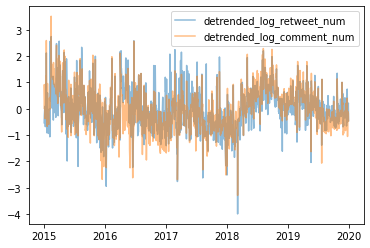

In [8]:
plt.plot(tweetSubMetrics1519.detrended_log_retweet_num, alpha=0.5, label="detrended_log_retweet_num")
plt.plot(tweetSubMetrics1519.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

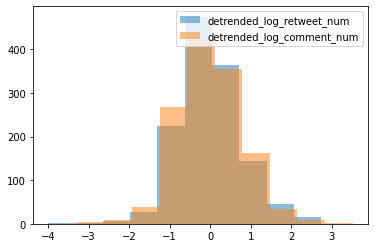

In [9]:
plt.hist(tweetSubMetrics1519.detrended_log_retweet_num, alpha=0.5, label="detrended_log_retweet_num")
plt.hist(tweetSubMetrics1519.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tweetSubMetrics1519.detrended_log_retweet_num)
print('Detrended Log Retweet Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

result = adfuller(tweetSubMetrics1519.detrended_log_comment_num)
print('Detrended Log Tweet Comment Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Detrended Log Retweet Number test:
ADF Statistic: -6.260720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Detrended Log Tweet Comment Number test:
ADF Statistic: -3.224855
p-value: 0.018590
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


### Value data preprocessing

In [11]:
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
companyValuesSub['date'] = pd.to_datetime(companyValuesSub['day_date']).dt.date
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(companyValuesSub['date']).map(isBusinessDay)
companyValuesSub = companyValuesSub[match_series]

companyValuesSubMetrics = companyValuesSub[['date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesSubMetrics = companyValuesSubMetrics.groupby(['date']).sum()

# 2019 year period
companyValuesSubMetrics2019 = companyValuesSubMetrics[(companyValuesSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesSubMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
companyValuesSubMetrics1519 = companyValuesSubMetrics[(companyValuesSubMetrics.index >= pd.to_datetime("2014/12/31")) \
    & (companyValuesSubMetrics.index <= pd.to_datetime("2019/12/31"))]


print(companyValuesSubMetrics1519.shape)
companyValuesSubMetrics1519.head(3)

(1305, 5)


C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\pandas\core\base.py:1160: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,close_value,volume,open_value,high_value,low_value
date,,,,,
2014-12-31,222.41,2392947,223.09,225.68,222.25
2015-01-01,222.41,2392947,223.09,225.68,222.25
2015-01-02,219.31,4753239,222.87,223.25,213.26


C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\diego\iCloudDrive\Documents\MBZUAI Sem\Semester 2\ML703 Probabilistic and Statistical Inference\Project\JN\ml703_timeSeriesCausalDiscovery\DataPreprocessing\data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lag_column] = temp[-final_ts_len:]


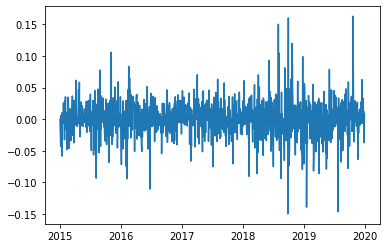

In [12]:
from data import set_datetime, detrend_ts, take_diff_ts

companyValuesSubMetrics1519['log_close_value'] = np.log(companyValuesSubMetrics1519['close_value'])

companyValuesSubMetrics1519 = take_diff_ts(data=companyValuesSubMetrics1519, \
    ts_column='log_close_value', lag_column='lag_log_close_value', lag=1, final_ts_len=companyValuesSubMetrics1519.shape[0] - 1)

plt.plot(companyValuesSubMetrics1519.lag_log_close_value)

(array([  3.,   5.,  26., 142., 637., 416.,  59.,  10.,   3.,   3.]),
 array([-0.1496786 , -0.11844   , -0.0872014 , -0.05596281, -0.02472421,
         0.00651439,  0.03775299,  0.06899159,  0.10023019,  0.13146879,
         0.16270738]),
 <BarContainer object of 10 artists>)

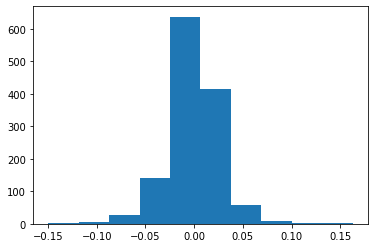

In [13]:
plt.hist(companyValuesSubMetrics1519.lag_log_close_value)

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(companyValuesSubMetrics1519.lag_log_close_value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -35.906313
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [15]:
dataFrame = np.column_stack((companyValuesSubMetrics1519.lag_log_close_value,
                    tweetSubMetrics1519.detrended_log_retweet_num[-1304:],
                    tweetSubMetrics1519.detrended_log_comment_num[-1304:]))
dataFrame[:5]

array([[ 0.        , -0.53468426,  0.01710925],
       [-0.01403627, -0.25577475,  0.9193793 ],
       [-0.04295024,  0.0889185 ,  0.11031555],
       [ 0.00564826, -0.49340294,  0.24040837],
       [-0.00156313, -0.10644112, -0.37613468]])

Text(0, 0.5, 'detrended_log_retweet_num')

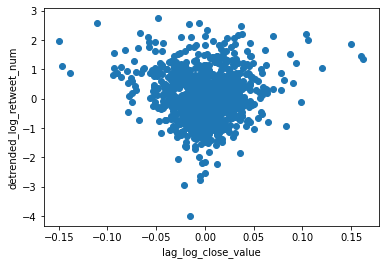

In [16]:
plt.scatter(dataFrame[:, 0], dataFrame[:, 1])
plt.xlabel("lag_log_close_value")
plt.ylabel("detrended_log_retweet_num")

Text(0, 0.5, 'detrended_log_comment_num')

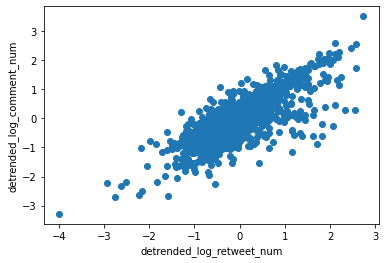

In [17]:
plt.scatter(dataFrame[:, 1], dataFrame[:, 2])
plt.xlabel("detrended_log_retweet_num")
plt.ylabel("detrended_log_comment_num")

### Causal Discovery - Constrained based

#### PC

In [18]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrame, alpha=0.05, indep_test=fisherz, stable=False, uc_rule=0, uc_priority=-1)

0 ind 1 | () with p-value 0.362678

0 ind 2 | () with p-value 0.086019



In [20]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrame, alpha=0.05, indep_test=kci, 
            stable=True, uc_rule=0, uc_priority=-1)

KeyboardInterrupt: 

#### FCI

In [21]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils

G = fci(dataFrame, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/tsla_fisherz_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X2 by sepset () pval:0.3626784295435129
phase1 remove X1 --- X3 by sepset () pval:0.08601886254859381


In [22]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils

G = fci(dataFrame, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/tsla_kci_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X2 by sepset () pval:0.3626784295435129
phase1 remove X1 --- X3 by sepset () pval:0.08601886254859381


## All Companies Analysis

#### Tweet data preprocessing

In [23]:
from data import set_datetime, detrend_ts
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
tweet['date'] = set_datetime(tweet.post_date)
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(tweet['date']).map(isBusinessDay)
tweetWD = tweet[match_series]

tweetMetrics = tweetWD[['ticker_symbol', 'date', 'comment_num', 'retweet_num', 'like_num']]
tweetMetrics = tweetMetrics.groupby(["ticker_symbol", "date"]).sum().reset_index()
tweetMetrics = tweetMetrics.pivot(index='date', columns=['ticker_symbol'])
tweetMetrics.columns = ["_".join(col) for col in tweetMetrics.columns]


# 2019 year period
tweetMetrics2019 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
tweetMetrics1519 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2014/12/31")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

print(tweetMetrics1519.shape)
tweetMetrics1519.head(3)

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\pandas\core\base.py:1160: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


(1304, 18)


,comment_num_AAPL,comment_num_AMZN,comment_num_GOOG,comment_num_GOOGL,comment_num_MSFT,comment_num_TSLA,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA,like_num_AAPL,like_num_AMZN,like_num_GOOG,like_num_GOOGL,like_num_MSFT,like_num_TSLA
date,,,,,,,,,,,,,,,,,,
2015-01-01,17,44,0,0,1,19,968,699,11,3,19,40,227,188,21,27,49,81
2015-01-02,128,11,9,5,6,47,2102,370,24,10,2,53,562,89,50,29,27,142
2015-01-05,139,15,18,9,15,21,392,52,62,41,69,75,554,123,143,96,93,191


In [24]:
for col in tweetMetrics1519.columns:
    print(f"Processing {col}")
    if sum(tweetMetrics1519[col] == 0) > 0:
        tweetMetrics1519[f'sqrt_{col}'] = np.sqrt(tweetMetrics1519[col])
        tweetMetrics1519[f'detrended_sqrt_{col}'] = detrend_ts(tweetMetrics1519[f'sqrt_{col}'])
    else:
        tweetMetrics1519[f'log_{col}'] = np.log(tweetMetrics1519[col])
        tweetMetrics1519[f'detrended_log_{col}'] = detrend_ts(tweetMetrics1519[f'log_{col}'])

tweetMetrics1519 = tweetMetrics1519[-1304:]

Processing comment_num_AAPL
Processing comment_num_AMZN
Processing comment_num_GOOG
Processing comment_num_GOOGL
Processing comment_num_MSFT
Processing comment_num_TSLA
Processing retweet_num_AAPL
Processing retweet_num_AMZN
Processing retweet_num_GOOG
Processing retweet_num_GOOGL
Processing retweet_num_MSFT
Processing retweet_num_TSLA
Processing like_num_AAPL
Processing like_num_AMZN
Processing like_num_GOOG
Processing like_num_GOOGL
Processing like_num_MSFT
Processing like_num_TSLA


C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

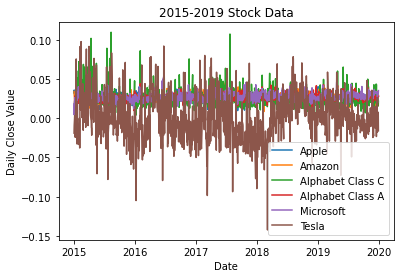

In [54]:
plt.plot(tweetMetrics1519["log_retweet_num_AAPL"], label="Apple")
plt.plot(tweetMetrics1519["log_retweet_num_AMZN"], label="Amazon")
plt.plot(tweetMetrics1519["sqrt_retweet_num_GOOG"], label="Alphabet Class C")
plt.plot(tweetMetrics1519["log_retweet_num_GOOGL"], label="Alphabet Class A")
plt.plot(tweetMetrics1519["log_retweet_num_MSFT"], label="Microsoft")
plt.plot(tweetMetrics1519["detrended_log_retweet_num_TSLA"], label="Tesla")
plt.title("2015-2019 Stock Data")
plt.xlabel("Date")
plt.ylabel("Daily Close Value")
plt.legend()
plt.savefig("stock_time_series_example.png")

In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in tweetMetrics1519.columns:
    adf_result = adfuller(tweetMetrics1519[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(tweetMetrics1519[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

COMMENT_NUM_AAPL test:
ADF Statistic: -5.655036807902879
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000001
Stationary
Zivot-Andrews Statistic: -7.28
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_AMZN test:
ADF Statistic: -3.308320956067426
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.014511
Stationary
Zivot-Andrews Statistic: -7.44
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOG test:
ADF Statistic: -15.769026136090748
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -16.51
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOGL test:
ADF Statistic: -8.019091001078175
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zi

45

In [26]:
stationary_cols[-25:]

['detrended_sqrt_comment_num_GOOG',
 'sqrt_comment_num_GOOGL',
 'detrended_sqrt_comment_num_GOOGL',
 'sqrt_comment_num_MSFT',
 'detrended_sqrt_comment_num_MSFT',
 'detrended_log_comment_num_TSLA',
 'log_retweet_num_AAPL',
 'detrended_log_retweet_num_AAPL',
 'log_retweet_num_AMZN',
 'detrended_log_retweet_num_AMZN',
 'sqrt_retweet_num_GOOG',
 'detrended_sqrt_retweet_num_GOOG',
 'log_retweet_num_GOOGL',
 'detrended_log_retweet_num_GOOGL',
 'log_retweet_num_MSFT',
 'detrended_log_retweet_num_MSFT',
 'detrended_log_retweet_num_TSLA',
 'log_like_num_AAPL',
 'detrended_log_like_num_AAPL',
 'detrended_log_like_num_AMZN',
 'log_like_num_GOOG',
 'detrended_log_like_num_GOOG',
 'log_like_num_GOOGL',
 'detrended_log_like_num_GOOGL',
 'detrended_log_like_num_MSFT']

In [27]:
selected_stationary_cols = []
selected_stationary_cols.append('log_retweet_num_AAPL')
selected_stationary_cols.append('log_retweet_num_AMZN')
selected_stationary_cols.append('sqrt_retweet_num_GOOG')
selected_stationary_cols.append('log_retweet_num_GOOGL')
selected_stationary_cols.append('log_retweet_num_MSFT')
selected_stationary_cols.append('detrended_log_retweet_num_TSLA')
selected_stationary_cols

['log_retweet_num_AAPL',
 'log_retweet_num_AMZN',
 'sqrt_retweet_num_GOOG',
 'log_retweet_num_GOOGL',
 'log_retweet_num_MSFT',
 'detrended_log_retweet_num_TSLA']

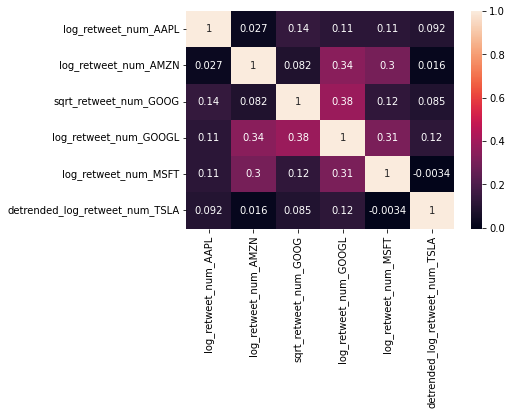

In [28]:
import seaborn as sns

# Correlation between Stationary variables
corrMatrix = tweetMetrics1519[selected_stationary_cols].corr(method="pearson")
sns.heatmap(corrMatrix, annot=True)
plt.savefig("./Correlation Plots/all_companies_tweets_corr.png", dpi=300, bbox_inches = 'tight')


In [29]:
abs(corrMatrix[:]) > 0.75

,log_retweet_num_AAPL,log_retweet_num_AMZN,sqrt_retweet_num_GOOG,log_retweet_num_GOOGL,log_retweet_num_MSFT,detrended_log_retweet_num_TSLA
log_retweet_num_AAPL,True,False,False,False,False,False
log_retweet_num_AMZN,False,True,False,False,False,False
sqrt_retweet_num_GOOG,False,False,True,False,False,False
log_retweet_num_GOOGL,False,False,False,True,False,False
log_retweet_num_MSFT,False,False,False,False,True,False
detrended_log_retweet_num_TSLA,False,False,False,False,False,True


In [30]:
tweetMetricsFinal = tweetMetrics1519[selected_stationary_cols]

tweetMetricsFinal.head(3)

,log_retweet_num_AAPL,log_retweet_num_AMZN,sqrt_retweet_num_GOOG,log_retweet_num_GOOGL,log_retweet_num_MSFT,detrended_log_retweet_num_TSLA
date,,,,,,
2015-01-01,0.032249,0.034142,0.009426,0.006678,0.018232,-0.019055
2015-01-02,0.035886,0.030826,0.013922,0.013997,0.004292,-0.009115
2015-01-05,0.028009,0.020597,0.022377,0.022574,0.026218,0.003169


#### Value data preprocessing

In [31]:
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
companyValues['date'] = pd.to_datetime(companyValues['day_date']).dt.date
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(companyValues['date']).map(isBusinessDay)
companyValuesWD = companyValues[match_series]

companyValuesMetrics = companyValuesWD[['ticker_symbol', 'date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesMetrics = companyValuesMetrics.groupby(["ticker_symbol", 'date']).sum().reset_index()
companyValuesMetrics = companyValuesMetrics.pivot(index='date', columns=['ticker_symbol'])
companyValuesMetrics.columns = ["_".join(col) for col in companyValuesMetrics.columns]

# 2019 year period
companyValuesMetrics2019 = companyValuesMetrics[(companyValuesMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
companyValuesMetrics1519 = companyValuesMetrics[(companyValuesMetrics.index >= pd.to_datetime("2014/12/31")) \
    & (companyValuesMetrics.index <= pd.to_datetime("2019/12/31"))]

print(companyValuesMetrics1519.shape)
companyValuesMetrics1519.head(3)

(1305, 30)


C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\pandas\core\base.py:1160: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,close_value_AAPL,close_value_AMZN,close_value_GOOG,close_value_GOOGL,close_value_MSFT,close_value_TSLA,volume_AAPL,volume_AMZN,volume_GOOG,volume_GOOGL,...,high_value_GOOG,high_value_GOOGL,high_value_MSFT,high_value_TSLA,low_value_AAPL,low_value_AMZN,low_value_GOOG,low_value_GOOGL,low_value_MSFT,low_value_TSLA
date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,110.38,310.35,526.40,530.66,46.45,222.41,41304780.0,2048676.0,1367110.0,1235889.0,...,532.60,538.4,47.44,225.68,110.21,310.0100,525.8,530.20,46.45,222.25
2015-01-01,110.38,310.35,526.40,530.66,46.45,222.41,41304780.0,2048676.0,1367110.0,1235889.0,...,532.60,538.4,47.44,225.68,110.21,310.0100,525.8,530.20,46.45,222.25
2015-01-02,109.33,308.52,524.81,529.55,46.76,219.31,53143770.0,2785167.0,1444809.0,1325271.0,...,531.27,535.8,47.42,223.25,107.35,306.9601,524.1,527.88,46.54,213.26


In [32]:
companyValuesMetrics1519.columns[:6]
# companyValuesMetrics1519[-1304:].shape

Index(['close_value_AAPL', 'close_value_AMZN', 'close_value_GOOG',
       'close_value_GOOGL', 'close_value_MSFT', 'close_value_TSLA'],
      dtype='object')

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

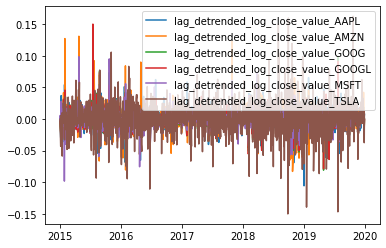

In [33]:
from data import set_datetime, detrend_ts, take_diff_ts

companyCloseValuesMetrics1519 = companyValuesMetrics1519[companyValuesMetrics1519.columns[:6]]

for col in companyCloseValuesMetrics1519.columns:
    companyCloseValuesMetrics1519[f'log_{col}'] = np.log(companyCloseValuesMetrics1519[col])
for col in companyCloseValuesMetrics1519.columns:
    companyCloseValuesMetrics1519[f'detrended_{col}'] = detrend_ts(companyCloseValuesMetrics1519[f'{col}'])

# Take differencing
lag = 1
final_ts_len = 1304
temp_lag = {}
for col in companyCloseValuesMetrics1519.columns:
    temp = np.diff(companyCloseValuesMetrics1519[col], n=lag)
    temp_lag[f"lag_{col}"] = temp
companyCloseValuesMetrics1519 = companyCloseValuesMetrics1519[-final_ts_len:]
for col in companyCloseValuesMetrics1519.columns:
    companyCloseValuesMetrics1519[f"lag_{col}"] = temp_lag[f"lag_{col}"][-final_ts_len:]

for col in companyCloseValuesMetrics1519.columns[-6:]:
    plt.plot(companyCloseValuesMetrics1519[f'{col}'], label=f'{col}')
plt.legend()

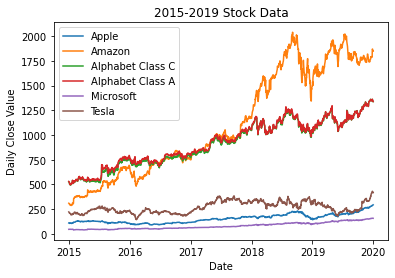

In [49]:
plt.plot(companyCloseValuesMetrics1519["close_value_AAPL"], label="Apple")
plt.plot(companyCloseValuesMetrics1519["close_value_AMZN"], label="Amazon")
plt.plot(companyCloseValuesMetrics1519["close_value_GOOG"], label="Alphabet Class C")
plt.plot(companyCloseValuesMetrics1519["close_value_GOOGL"], label="Alphabet Class A")
plt.plot(companyCloseValuesMetrics1519["close_value_MSFT"], label="Microsoft")
plt.plot(companyCloseValuesMetrics1519["close_value_TSLA"], label="Tesla")
plt.title("2015-2019 Stock Data")
plt.xlabel("Date") 
plt.ylabel("Daily Close Value")
plt.legend()
plt.savefig("stock_time_series_example.png")

In [32]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in companyCloseValuesMetrics1519.columns:
    adf_result = adfuller(companyCloseValuesMetrics1519[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(companyCloseValuesMetrics1519[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

CLOSE_VALUE_AAPL test:
ADF Statistic: 1.055651664948278
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.994820
Non-Stationary
Zivot-Andrews Statistic: -1.81
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 1.00
Non-Stationary
CLOSE_VALUE_AMZN test:
ADF Statistic: -0.8407237639557726
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.806866
Non-Stationary
Zivot-Andrews Statistic: -4.41
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.15
Non-Stationary
CLOSE_VALUE_GOOG test:
ADF Statistic: -0.8273347937513253
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.810961
Non-Stationary
Zivot-Andrews Statistic: -4.78
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.06
Non-Stationary
CLOSE_VALUE_GOOGL test:
ADF Statistic: -0.9501535503930998
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value

Zivot-Andrews Statistic: -15.37
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
LAG_CLOSE_VALUE_TSLA test:
ADF Statistic: -36.199997051505676
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -36.30
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
LAG_LOG_CLOSE_VALUE_AAPL test:
ADF Statistic: -26.561200375971357
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -26.72
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
LAG_LOG_CLOSE_VALUE_AMZN test:
ADF Statistic: -26.384404578362705
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -26.50
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

28

In [33]:
stationary_cols[4:10]

['lag_close_value_AAPL',
 'lag_close_value_AMZN',
 'lag_close_value_GOOG',
 'lag_close_value_GOOGL',
 'lag_close_value_MSFT',
 'lag_close_value_TSLA']

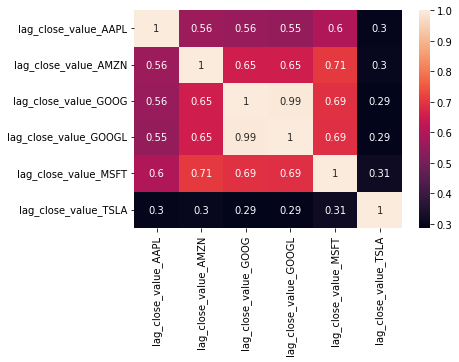

In [34]:
import seaborn as sns

# Correlation between Stationary variables
corrMatrix = companyCloseValuesMetrics1519[stationary_cols[4:10]].corr(method="pearson")
sns.heatmap(corrMatrix, annot=True)
plt.savefig("./Correlation Plots/all_companies_returns_corr.png", dpi=300, bbox_inches = 'tight')

In [35]:
companyCloseValuesMetricsFinal = companyCloseValuesMetrics1519[stationary_cols[4:10]]

companyCloseValuesMetricsFinal.head(3)

,lag_close_value_AAPL,lag_close_value_AMZN,lag_close_value_GOOG,lag_close_value_GOOGL,lag_close_value_MSFT,lag_close_value_TSLA
date,,,,,,
2015-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-02,-0.011900,-0.002362,-0.003206,-0.002229,0.007172,-0.011175
2015-01-05,-0.034906,-0.008170,-0.022058,-0.020259,-0.010063,-0.033236


### Linearity Analysis

In [36]:
dataFrameCompanies = np.column_stack((
    companyCloseValuesMetricsFinal,
    tweetMetricsFinal))
dataFrameCompanies.shape

(1304, 12)

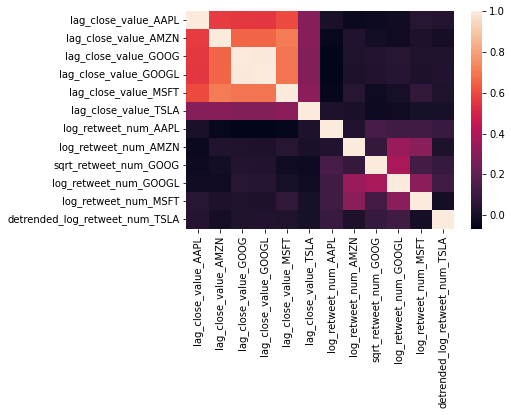

In [37]:
import seaborn as sns

# Correlation between Stationary variables
companyFinal = pd.concat([companyCloseValuesMetricsFinal, tweetMetricsFinal], axis=1)
corrMatrix = companyFinal.corr(method="pearson")
sns.heatmap(corrMatrix, annot=False)
plt.savefig("./Correlation Plots/all_companies_all data_corr.png", dpi=300, bbox_inches = 'tight')

#### Apple plots

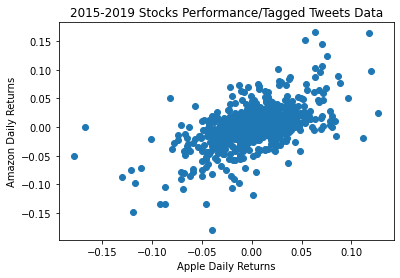

In [38]:
x_var = dataFrameCompanies[:, 0]
y_var = dataFrameCompanies[:, 1]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Apple Daily Returns")
plt.ylabel("Amazon Daily Returns")
plt.savefig("./Linear Analysis Plots/apple_amazon_returns.jpeg")

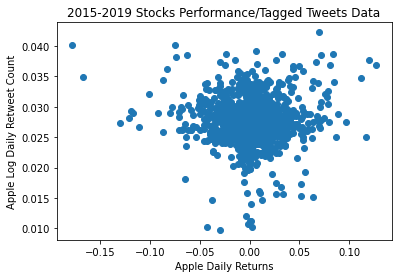

In [39]:
x_var = dataFrameCompanies[:, 0]
y_var = dataFrameCompanies[:, 6]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Apple Daily Returns")
plt.ylabel("Apple Log Daily Retweet Count")
plt.savefig("./Linear Analysis Plots/apple_returns_retweet.jpeg")

#### Amazon plots

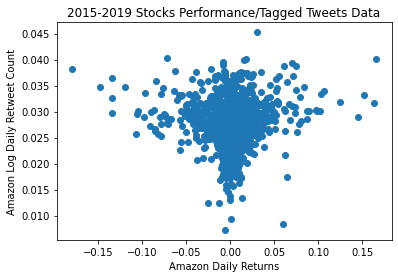

In [40]:
x_var = dataFrameCompanies[:, 1]
y_var = dataFrameCompanies[:, 7]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Amazon Daily Returns")
plt.ylabel("Amazon Log Daily Retweet Count")
plt.savefig("./Linear Analysis Plots/amazon_returns_retweet.jpeg")

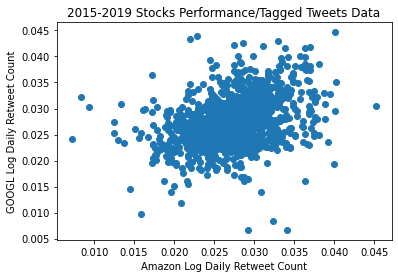

In [41]:
x_var = dataFrameCompanies[:, 7]
y_var = dataFrameCompanies[:, 9]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Amazon Log Daily Retweet Count")
plt.ylabel("GOOGL Log Daily Retweet Count")
plt.savefig("./Linear Analysis Plots/amazon_googl_retweet.jpeg")

#### Google plots

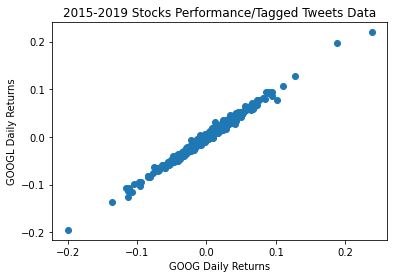

In [42]:
x_var = dataFrameCompanies[:, 2]
y_var = dataFrameCompanies[:, 3]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("GOOG Daily Returns")
plt.ylabel("GOOGL Daily Returns")
plt.savefig("./Linear Analysis Plots/goog_googl_returns.jpeg")

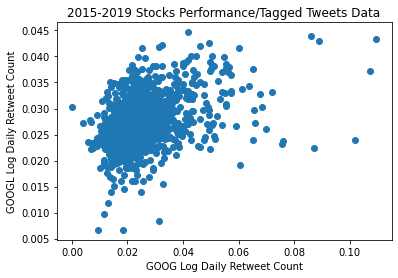

In [43]:
x_var = dataFrameCompanies[:, 8]
y_var = dataFrameCompanies[:, 9]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("GOOG Log Daily Retweet Count")
plt.ylabel("GOOGL Log Daily Retweet Count")
plt.savefig("./Linear Analysis Plots/goog_googl_returns.jpeg")

#### Microsoft plots

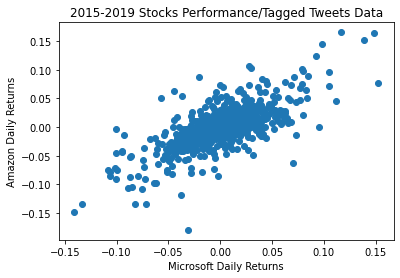

In [44]:
x_var = dataFrameCompanies[:, 4]
y_var = dataFrameCompanies[:, 1]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Microsoft Daily Returns")
plt.ylabel("Amazon Daily Returns")
plt.savefig("./Linear Analysis Plots/microsoft_amazon_returns.jpeg")

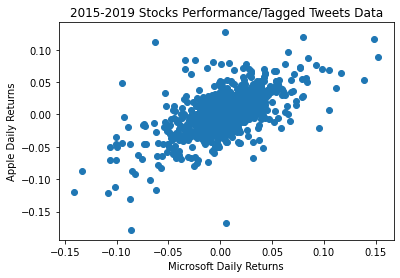

In [45]:
x_var = dataFrameCompanies[:, 4]
y_var = dataFrameCompanies[:, 0]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Microsoft Daily Returns")
plt.ylabel("Apple Daily Returns")
plt.savefig("./Linear Analysis Plots/microsoft_apple_returns.jpeg")

#### Tesla plots

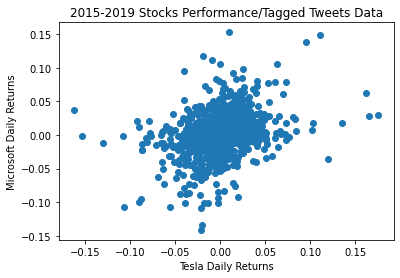

In [46]:
x_var = dataFrameCompanies[:, 5]
y_var = dataFrameCompanies[:, 4]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Tesla Daily Returns")
plt.ylabel("Microsoft Daily Returns")
plt.savefig("./Linear Analysis Plots/tesla_microsoft_returns.jpeg")

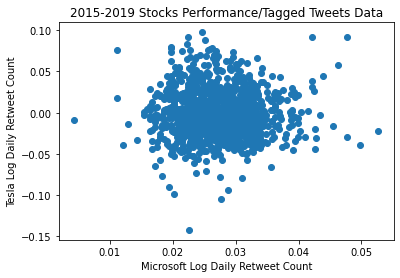

In [47]:
x_var = dataFrameCompanies[:, 10]
y_var = dataFrameCompanies[:, 11]

plt.scatter(x_var, y_var)
plt.title("2015-2019 Stocks Performance/Tagged Tweets Data")
plt.xlabel("Microsoft Log Daily Retweet Count")
plt.ylabel("Tesla Log Daily Retweet Count")
plt.savefig("./Linear Analysis Plots/tesla_microsoft_retweet.jpeg")

### Causal Discovery - Constrained based

In [48]:
dataFrameCompanies = np.column_stack((
    companyCloseValuesMetricsFinal,
    tweetMetricsFinal))
dataFrameCompanies[:5].shape

(5, 12)

In [49]:
print(f"Columns for values: \n{companyCloseValuesMetricsFinal.columns}")
print(f"Columns for tweets: \n{tweetMetricsFinal.columns}")

Columns for values: 
Index(['lag_close_value_AAPL', 'lag_close_value_AMZN', 'lag_close_value_GOOG',
       'lag_close_value_GOOGL', 'lag_close_value_MSFT',
       'lag_close_value_TSLA'],
      dtype='object')
Columns for tweets: 
Index(['log_retweet_num_AAPL', 'log_retweet_num_AMZN', 'sqrt_retweet_num_GOOG',
       'log_retweet_num_GOOGL', 'log_retweet_num_MSFT',
       'detrended_log_retweet_num_TSLA'],
      dtype='object')


#### PC

In [50]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

pc_fisherz = PC.pc(data=dataFrameCompanies, alpha=0.05, indep_test=fisherz, 
            stable=True, uc_rule=0, uc_priority=-1)

0 ind 6 | () with p-value 0.371494

0 ind 7 | () with p-value 0.104234

0 ind 8 | () with p-value 0.146362

0 ind 9 | () with p-value 0.251142

0 ind 10 | () with p-value 0.055517

0 ind 11 | () with p-value 0.102220

1 ind 7 | () with p-value 0.157769

1 ind 8 | () with p-value 0.299028

1 ind 9 | () with p-value 0.209415

1 ind 10 | () with p-value 0.289967

1 ind 11 | () with p-value 0.413118

2 ind 7 | () with p-value 0.259436

2 ind 8 | () with p-value 0.135256

2 ind 10 | () with p-value 0.220030

2 ind 11 | () with p-value 0.238180

3 ind 7 | () with p-value 0.291712

3 ind 8 | () with p-value 0.156370

3 ind 9 | () with p-value 0.063287

3 ind 10 | () with p-value 0.295610

3 ind 11 | () with p-value 0.164902

4 ind 7 | () with p-value 0.055710

4 ind 8 | () with p-value 0.160644

4 ind 9 | () with p-value 0.489603

4 ind 11 | () with p-value 0.238796

5 ind 6 | () with p-value 0.313987

5 ind 7 | () with p-value 0.410867

5 ind 8 | () with p-value 0.147822

5 ind 9 | () with p

In [51]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

pc_kci = PC.pc(data=dataFrameCompanies, alpha=0.05, indep_test=kci, 
            stable=True, uc_rule=0, uc_priority=-1)

0 ind 8 | () with p-value 0.424907

0 ind 9 | () with p-value 0.067924

1 ind 8 | () with p-value 0.306218

2 ind 6 | () with p-value 0.054072

3 ind 6 | () with p-value 0.074810

4 ind 6 | () with p-value 0.463928

4 ind 8 | () with p-value 0.349155

5 ind 8 | () with p-value 0.566372

6 ind 2 | () with p-value 0.054072

6 ind 3 | () with p-value 0.074810

6 ind 4 | () with p-value 0.463928

6 ind 11 | () with p-value 0.482598

8 ind 0 | () with p-value 0.424907

8 ind 1 | () with p-value 0.306218

8 ind 4 | () with p-value 0.349155

8 ind 5 | () with p-value 0.566372

8 ind 11 | () with p-value 0.342874

9 ind 0 | () with p-value 0.067924

10 ind 11 | () with p-value 0.160739

11 ind 6 | () with p-value 0.482598

11 ind 8 | () with p-value 0.342874

11 ind 10 | () with p-value 0.160739

0 ind 3 | (2,) with p-value 0.791974

0 ind 7 | (1,) with p-value 0.541808

0 ind 10 | (1,) with p-value 0.549508

0 ind 11 | (1,) with p-value 0.078803

1 ind 2 | (3,) with p-value 0.545511

1 ind 6 

#### FCI

In [52]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

G = fci(dataFrameCompanies, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/all_companies_fisherz_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X7 by sepset () pval:0.37149364453326683
phase1 remove X1 --- X8 by sepset () pval:0.10423377139998014
phase1 remove X1 --- X9 by sepset () pval:0.146362384056548
phase1 remove X1 --- X10 by sepset () pval:0.2511418161584308
phase1 remove X1 --- X11 by sepset () pval:0.05551668967114132
phase1 remove X1 --- X12 by sepset () pval:0.10221997162949692
phase1 remove X2 --- X8 by sepset () pval:0.15776885237627847
phase1 remove X2 --- X9 by sepset () pval:0.2990283712947467
phase1 remove X2 --- X10 by sepset () pval:0.20941513897957398
phase1 remove X2 --- X11 by sepset () pval:0.2899668590448595
phase1 remove X2 --- X12 by sepset () pval:0.4131175577399102
phase1 remove X3 --- X8 by sepset () pval:0.25943559327131394
phase1 remove X3 --- X9 by sepset () pval:0.13525566319196303
phase1 remove X3 --- X11 by sepset () pval:0.22002979218831853
phase1 remove X3 --- X12 by sepset () pval:0.23818006165265693
phase1 remove X4 --- X8 by sepset () pval:0.29171234519888845
phase1

In [ ]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

G = fci(dataFrameCompanies, kci, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/all_companies_kci_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X9 by sepset () pval:0.4249068897367352
phase1 remove X1 --- X10 by sepset () pval:0.06792403343767262
phase1 remove X2 --- X9 by sepset () pval:0.306217771240197
phase1 remove X3 --- X7 by sepset () pval:0.054072395395715955
phase1 remove X4 --- X7 by sepset () pval:0.07481026591669959
phase1 remove X5 --- X7 by sepset () pval:0.4639275643516424
phase1 remove X5 --- X9 by sepset () pval:0.34915479424300744
phase1 remove X6 --- X9 by sepset () pval:0.5663722951399365
phase1 remove X7 --- X12 by sepset () pval:0.4825982698561754
phase1 remove X9 --- X12 by sepset () pval:0.34287352282323336
phase1 remove X11 --- X12 by sepset () pval:0.16073888506322598
phase1 remove X1 --- X4 by sepset ('X3',) pval:0.7919739056624874
phase1 remove X1 --- X8 by sepset ('X2',) pval:0.541807881287727
phase1 remove X1 --- X11 by sepset ('X2',) pval:0.549507833423207
phase1 remove X1 --- X12 by sepset ('X2',) pval:0.0788025870364567
phase1 remove X2 --- X3 by sepset ('X4',) pval:0.54551

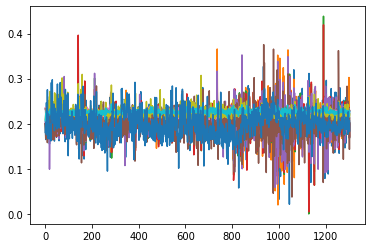

In [51]:
dataFrameCompaniesNonNegative = dataFrameCompanies + np.abs(np.min(dataFrameCompanies))

plt.plot(dataFrameCompaniesNonNegative)

Implemented by Diego Saenz